In [1]:
import os
import sys
import re
from matplotlib import pyplot as plt
from coffea.util import load
from omegaconf import OmegaConf
import numpy as np
from pocket_coffea.utils.plot_utils import PlotManager


In [2]:
# input_dir="/work/mmalucch/out_hh4b/out_JMENanoData_comparison_all_variables/"
# input_dir="/work/mmalucch/out_hh4b/out_test_common_dataweights/"
# input_dir="/work/mmalucch/out_hh4b/out_JMENanoData_comparison_all_variables/"
input_dir="/work/mmalucch/out_hh4b/out_JMENanoData_comparisonRun2_all_variables_SR_CR_PADm10/"
only_cat=None
workers=8
log=False
density=True
verbose=1
index_file=None
year="2022_postEE"

In [3]:
# Using the `input_dir` argument, read the default config and coffea files (if not set with argparse):
cfg = os.path.join(input_dir, "parameters_dump.yaml")
inputfile = os.path.join(input_dir, "output_all.coffea")
outputdir = os.path.join(input_dir, "plots")

# Load yaml file with OmegaConf
if cfg[-5:] == ".yaml":
    parameters_dump = OmegaConf.load(cfg)
else:
    raise Exception("The input file format is not valid. The config file should be a in .yaml format.")

parameters = parameters_dump

# Resolving the OmegaConf
try:
    OmegaConf.resolve(parameters)
except Exception as e:
    print("Error during resolution of OmegaConf parameters magic, please check your parameters files.")
    raise(e)

style_cfg = parameters['plotting_style']

if os.path.isfile( inputfile ): accumulator = load(inputfile)
else: sys.exit(f"Input file '{inputfile}' does not exist")


if not os.path.exists(outputdir):
    os.makedirs(outputdir)

variables = accumulator['variables'].keys()

# if exclude_hist:
#     variables_to_exclude = [s for s in variables if any([re.search(p, s) for p in exclude_hist])]
#     variables = [s for s in variables if s not in variables_to_exclude]
# if only_hist:
#     variables = [s for s in variables if any([re.search(p, s) for p in only_hist])]
hist_objs = { v : accumulator['variables'][v] for v in variables }


# print(accumulator['variables'])


sample=list(accumulator["columns"].keys())[0]
dataset=list(accumulator["columns"][sample].keys())[0]
category=list(accumulator["columns"][sample][dataset].keys())[2]
print(accumulator["columns"][sample][dataset].keys())
category="2b_control_region_postWRun2"

print(sample,dataset, category)
col=accumulator["columns"][sample][dataset][category]
for k in col.keys():
    print(k)
    col[k]=col[k].value#[col[k].value!=-999]

# print(col['events_bkg_morphing_dnn_weight'])
print(col['weight'])

dict_keys(['4b_control_region', '2b_control_region_preW', '2b_control_region_postW', '4b_control_regionRun2', '2b_control_region_preWRun2', '2b_control_region_postWRun2', '4b_signal_region', '2b_signal_region_preW', '2b_signal_region_postW', '4b_signal_regionRun2', '2b_signal_region_preWRun2', '2b_signal_region_postWRun2'])
DATA_JetMET_JMENano_skimmed DATA_JetMET_JMENano_2022_postEE_EraE 2b_control_region_postWRun2
weight
HiggsLeadingRun2_pt
HiggsLeadingRun2_mass
HiggsLeadingRun2_dR
HiggsSubLeadingRun2_pt
HiggsSubLeadingRun2_mass
HiggsSubLeadingRun2_dR
HHRun2_mass
events_dR_min
events_dR_max
events_bkg_morphing_dnn_weightRun2
[0.13072214 0.68114692 0.15479681 ... 0.02437144 0.09637959 3.47200465]


/tmp/ipykernel_49948/1255247137.py:6: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


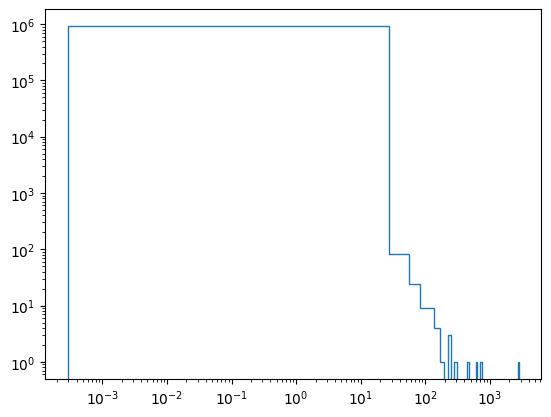

In [4]:
# plot histo of the weights
fig, ax = plt.subplots()
ax.hist(col['weight'], bins=100, histtype='step', label='weight')
ax.set_xscale('log')
ax.set_yscale('log')
fig.show()


In [8]:
category="2b_signal_region_postWRun2"
col=accumulator["columns"][sample][dataset][category]
# for k in col.keys():
#     print(k)
#     col[k]=col[k].value
mask_w=col['weight']>100
for c in col.keys():
    # if ("mass" in c and "Higgs" in c) or c=="weight":
    print(c)
    print(col[c][mask_w])
    print(len(col[c][mask_w])/len(col[c]))


sys.exit()

weight
[104.79024506 120.03411865 173.23512268 111.6833725  130.72885132
 185.21218872]
1.3256533814103626e-05
HiggsLeadingRun2_pt
[587.3628  551.4553  572.90955 762.8308  634.21735 788.26886]
1.3256533814103626e-05
HiggsLeadingRun2_mass
[120.84397  117.08384  137.82442  119.060905 144.17389  116.446205]
1.3256533814103626e-05
HiggsLeadingRun2_dR
[0.732762   0.52073604 0.4936572  0.46363243 2.1459625  0.4453766 ]
1.3256533814103626e-05
HiggsSubLeadingRun2_pt
[404.1643  516.3909  542.5882  631.2098   85.07376 472.14624]
1.3256533814103626e-05
HiggsSubLeadingRun2_mass
[149.62834  118.33229  137.45912  112.96549  119.98784  112.145775]
1.3256533814103626e-05
HiggsSubLeadingRun2_dR
[0.83551884 0.58440685 0.8163334  0.4985156  0.5172005  0.5531603 ]
1.3256533814103626e-05
HHRun2_mass
[ 810.70233 1109.9159  1154.8824  2492.7441   661.77795 1248.6976 ]
1.3256533814103626e-05
events_dR_min
[0.73276198 0.52073604 0.4936572  0.46363243 0.51720053 0.4453766 ]
1.3256533814103626e-05
events_dR_max


SystemExit: 

In [ ]:
num_4b_run2=accumulator["cutflow"]["4b_control_regionRun2"]["DATA_JetMET_JMENano_2022_postEE_EraE"]["DATA_JetMET_JMENano_skimmed"]
num_2b_run2=accumulator["cutflow"]["2b_control_region_preWRun2"]["DATA_JetMET_JMENano_2022_postEE_EraE"]["DATA_JetMET_JMENano_skimmed"]
num_2b_run2=accumulator["cutflow"]["2b_control_region_postWRun2"]["DATA_JetMET_JMENano_2022_postEE_EraE"]["DATA_JetMET_JMENano_skimmed"]
print(num_4b_run2,num_2b_run2, num_4b_run2/num_2b_run2)

#from AN
print(77380/4189666)


num_4b=accumulator["cutflow"]["4b_control_region"]["DATA_JetMET_JMENano_2022_postEE_EraE"]["DATA_JetMET_JMENano_skimmed"]
num_2b=accumulator["cutflow"]["2b_control_region_preW"]["DATA_JetMET_JMENano_2022_postEE_EraE"]["DATA_JetMET_JMENano_skimmed"]
num_2b=accumulator["cutflow"]["2b_control_region_postW"]["DATA_JetMET_JMENano_2022_postEE_EraE"]["DATA_JetMET_JMENano_skimmed"]
print(num_4b,num_2b, num_4b/num_2b)

20959 931056 0.022510998264336408
0.018469252680285254
29516 1018217 0.028987926935024656


In [ ]:
plotter = PlotManager(
        variables=variables,
        hist_objs=hist_objs,
        datasets_metadata=accumulator['datasets_metadata'],
        plot_dir=outputdir,
        style_cfg=style_cfg,
        only_cat=only_cat,
        only_year=year,
        workers=workers,
        log=log,
        density=density,
        verbose=verbose,
        save=False,
        index_file=index_file
    )
color_list = ["black", "red", "blue"]

cat_list=   ["4b_control_regionRun2", "2b_control_region_preWRun2", "2b_control_region_postWRun2"]
for rm_str in ["", "Run2"]:
    for var in variables:
        if "Jet" in var: continue
        fig, (ax, ax_ratio) = plt.subplots(2,1,figsize=[6,6],sharex=True, gridspec_kw={"height_ratios": [2.5, 1]})
        for i, cat in enumerate(cat_list):
            cat=cat.replace(rm_str, "")
            shape = plotter.shape_objects[f"{var}_{year}"]
            # stacks = shape._get_stacks(cat)
            # shape.syst_manager.update(cat, stacks)
            print(f"Plotting {var} for {cat}")
            sample = "DATA_JetMET_JMENano_skimmed"
            h = shape.h_dict[sample][{'cat':cat}]
            name_4b = "4b_control_regionRun2" if "Run2" in cat else "4b_control_region"
            h_den=shape.h_dict[sample][{'cat':name_4b}]
        
            norm_factor = h_den.values().sum() / h.values().sum()
            h_norm = h * norm_factor
            h_ratio = (h_norm.values()/h_den.values())#*(h_den.values().sum()/h.values().sum())
     
            err = np.sqrt(h_norm.values())
            err_den = np.sqrt(h_den.values())
            ratio_err = np.sqrt((err / h_den.values()) ** 2 + (h_norm.values() * err_den / h_den.values()**2) ** 2)
            print(norm_factor)
            if "4b" in cat:
                ax.errorbar(h.axes[0].centers, h.values(), yerr=np.sqrt(h.values()), label=cat, color=color_list[i], fmt=".")
            else:
                ax.step(h.axes[0].edges, np.append(h_norm.values(), h_norm.values()[-1]), where="post", label=cat, color=color_list[i])
                # h.plot(ax=ax, label=cat, color=color_list[i], histtype="step")
            
            if "4b" not in cat:
                ax_ratio.errorbar(
                    h.axes[0].centers,
                    h_ratio,
                    yerr=ratio_err,
                    fmt=".",
                    label=cat,
                    color=color_list[i],
                )
            else:
                ax_ratio.axhline(y=1, color="black", linestyle="--")
                ax_ratio.fill_between(
                    h.axes[0].centers,
                    1 - ratio_err,
                    1 + ratio_err,
                    color="grey",
                    alpha=0.5,
                )
            ax_ratio.set_ylim(0.5, 1.5)
            # h_ratio.plot(ax=ax_ratio, label=cat, density=density)
        
        ax.legend()
        ax.grid()
        ax_ratio.grid()
        break

# Do histograms using the columns of the dataset

In [ ]:
num_4b_run2=accumulator["cutflow"]["4b_control_regionRun2"]["DATA_JetMET_JMENano_2022_postEE_EraE"]["DATA_JetMET_JMENano_skimmed"]
num_2b_run2=accumulator["cutflow"]["2b_control_region_preWRun2"]["DATA_JetMET_JMENano_2022_postEE_EraE"]["DATA_JetMET_JMENano_skimmed"]
num_2b_run2=accumulator["cutflow"]["2b_control_region_postWRun2"]["DATA_JetMET_JMENano_2022_postEE_EraE"]["DATA_JetMET_JMENano_skimmed"]
print(num_4b_run2,num_2b_run2, num_4b_run2/num_2b_run2)
print(num_4b_run2* 26671.7/5807.0,num_2b_run2* 26671.7/5807.0, num_4b_run2/num_2b_run2)

#from AN
print(77380/4189666)


num_4b=accumulator["cutflow"]["4b_control_region"]["DATA_JetMET_JMENano_2022_postEE_EraE"]["DATA_JetMET_JMENano_skimmed"]
num_2b=accumulator["cutflow"]["2b_control_region_preW"]["DATA_JetMET_JMENano_2022_postEE_EraE"]["DATA_JetMET_JMENano_skimmed"]
num_2b=accumulator["cutflow"]["2b_control_region_postW"]["DATA_JetMET_JMENano_2022_postEE_EraE"]["DATA_JetMET_JMENano_skimmed"]
print(num_4b,num_2b, num_4b/num_2b)



20959 931056 0.022510998264336408
96265.22478043742 4276364.09767522 0.022510998264336408
0.018469252680285254
29516 1018217 0.028987926935024656


In [ ]:
accumulator = load(inputfile)
col_cat = accumulator["columns"][sample][dataset]
cat_list = [
    "4b_control_regionRun2",
    "2b_control_region_preWRun2",
    "2b_control_region_postWRun2",
]

vars = col_cat["4b_control_regionRun2"].keys()

RUN2 = False

color_list = ["black", "red", "blue"]
for var in vars:
    fig, (ax, ax_ratio) = plt.subplots(
        2, 1, figsize=[6, 6], sharex=True, gridspec_kw={"height_ratios": [2.5, 1]}
    )
    for i, cat in enumerate(cat_list):

        if not RUN2:
            cat = cat.replace("Run2", "")
            var = var.replace("Run2", "")

        weights = col_cat[cat]["weight"].value
        mask_w = weights > -1
        weights = weights[mask_w]
        col = col_cat[cat][var].value[mask_w]

        name_4b = "4b_control_regionRun2" if "Run2" in cat else "4b_control_region"

        print(len(col_cat[cat][var].value), len(col_cat[cat][var].value[mask_w]))

        # if "Run2" in cat:
        #     norm_factor = (num_4b_run2 / num_2b_run2) if "2b" in cat else 1
        # else:
        #     norm_factor = (num_4b / num_2b) if "2b" in cat else 1
        # norm_factor = 1 / weights.sum()

        norm_factor = col_cat[name_4b]["weight"].value.sum() / weights.sum()

        print(var, cat, weights, norm_factor, weights.sum())

        h, bins = np.histogram(col, bins=30, weights=weights * norm_factor)
        if "4b" in cat:
            ax.errorbar(bins[:-1], h, yerr=np.sqrt(h), label=cat, color=color_list[i], fmt=".")
        else:
            ax.hist(
                col,
                bins=30,
                histtype="step",
                label=cat,
                weights=weights * norm_factor,
                color=color_list[i],
            )

        # draw the ratio
        col_den = col_cat[name_4b][var].value
        weights_den = col_cat[name_4b]["weight"].value

        h_den, bins = np.histogram(col_den, bins=30, weights=weights_den)
        ratio = h / h_den
        err = np.sqrt(h)
        err_den = np.sqrt(h_den)
        ratio_err = np.sqrt((err / h_den) ** 2 + (h * err_den / h_den**2) ** 2)
        if "4b" not in cat:
            ax_ratio.errorbar(
                bins[:-1],
                ratio,
                yerr=ratio_err,
                fmt=".",
                label=cat,
                color=color_list[i],
            )
        else:
            ax_ratio.axhline(y=1, color="black", linestyle="--")
            ax_ratio.fill_between(
                bins[:-1],
                1 - ratio_err,
                1 + ratio_err,
                color="grey",
                alpha=0.5,
            )
            ax_ratio.set_ylim(0.5, 1.5)

    ax.legend()
    ax.set_yscale("log")
    # set name of the x-axis
    plt.xlabel(var)
    plt.show()

    ax.grid()
    ax_ratio.grid()
    # break